# Import libraries

In [1]:
import vaex
import pandas as pd
import numpy as np

# Random dataset to test with

In [21]:
# n_rows = 100000 <-- with a million your computer will really suffer with 16 GB of RAM
n_rows = 100000
n_cols = 1000

df = pd.DataFrame(np.random.randint(0, 100, size=(n_rows, n_cols)), columns=['col%d' % i for i in range(n_cols)])
df.head()

# check main-memory usage:
df.info(memory_usage='deep')

# save it to disk:
file_path = 'big_file.csv'
df.to_csv(file_path, index=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Columns: 1000 entries, col0 to col999
dtypes: int64(1000)
memory usage: 762.9 MB


# Convert CSV file to HDF5

In [14]:
#   it'll first create temporary chunks and then gather them and delete temporary chunks
dv = vaex.from_csv(file_path, convert=True, chunk_size=100_000)

type(dv)

In [ ]:
# Open HDF5 with Vaex will not load the whole file, it will lazily get the data:
dv = vaex.open(file_path + '.hdf5')

# Playing with the Dataframe

## Column operations

In [15]:

suma = dv.col1.sum()
suma

array(4936130)

## Plotting

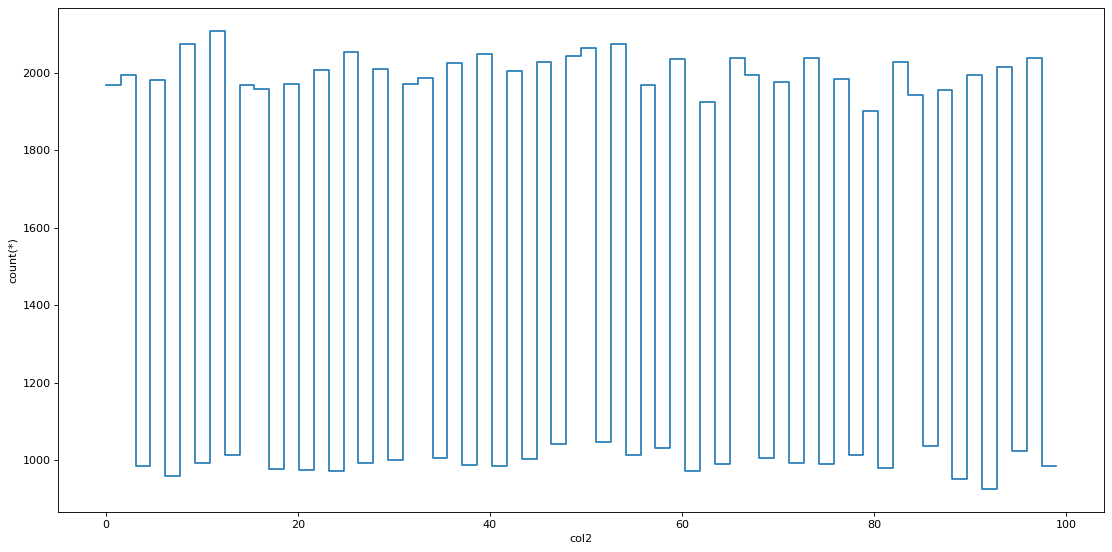

In [2]:
dv.plot1d(dv.col2, figsize=(14, 7))

## Virtual Columns

In [18]:
# Operation
dv['col1_plus_col2'] = dv.col1 + dv.col2

In [20]:
# Content
dv['col1_plus_col2']

Expression = col1_plus_col2
Length: 100,000 dtype: int64 (column)
-------------------------------------
    0  128
    1  137
    2   55
    3   96
    4   92
   ...    
99995  148
99996  150
99997   20
99998  120
99999  156

# Filtering

In [9]:
dv_90 = dv[dv.col1 > 90]
dv_90

#,col0,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12,col13,col14,col15,col16,col17,col18,col19,col20,col21,col22,col23,col24,col25,col26,col27,col28,col29,col30,col31,col32,col33,col34,col35,col36,col37,col38,col39,col40,col41,col42,col43,col44,col45,col46,col47,col48,col49,col50,col51,col52,col53,col54,col55,col56,col57,col58,col59,col60,col61,col62,col63,col64,col65,col66,col67,col68,col69,col70,col71,col72,col73,col74,col75,col76,col77,col78,col79,col80,col81,col82,col83,col84,col85,col86,col87,col88,col89,col90,col91,col92,col93,col94,col95,col96,col97,col98,col99,col100,col101,col102,col103,col104,col105,col106,col107,col108,col109,col110,col111,col112,col113,col114,col115,col116,col117,col118,col119,col120,col121,col122,col123,col124,col125,col126,col127,col128,col129,col130,col131,col132,col133,col134,col135,col136,col137,col138,col139,col140,col141,col142,col143,col144,col145,col146,col147,col148,col149,col150,col151,col152,col153,col154,col155,col156,col157,col158,col159,col160,col161,col162,col163,col164,col165,col166,col167,col168,col169,col170,col171,col172,col173,col174,col175,col176,col177,col178,col179,col180,col181,col182,col183,col184,col185,col186,col187,col188,col189,col190,col191,col192,col193,col194,col195,col196,col197,col198,col199,col200,col201,col202,col203,col204,col205,col206,col207,col208,col209,col210,col211,col212,col213,col214,col215,col216,col217,col218,col219,col220,col221,col222,col223,col224,col225,col226,col227,col228,col229,col230,col231,col232,col233,col234,col235,col236,col237,col238,col239,col240,col241,col242,col243,col244,col245,col246,col247,col248,col249,col250,col251,col252,col253,col254,col255,col256,col257,col258,col259,col260,col261,col262,col263,col264,col265,col266,col267,col268,col269,col270,col271,col272,col273,col274,col275,col276,col277,col278,col279,col280,col281,col282,col283,col284,col285,col286,col287,col288,col289,col290,col291,col292,col293,col294,col295,col296,col297,col298,col299,col300,col301,col302,col303,col304,col305,col306,col307,col308,col309,col310,col311,col312,col313,col314,col315,col316,col317,col318,col319,col320,col321,col322,col323,col324,col325,col326,col327,col328,col329,col330,col331,col332,col333,col334,col335,col336,col337,col338,col339,col340,col341,col342,col343,col344,col345,col346,col347,col348,col349,col350,col351,col352,col353,col354,col355,col356,col357,col358,col359,col360,col361,col362,col363,col364,col365,col366,col367,col368,col369,col370,col371,col372,col373,col374,col375,col376,col377,col378,col379,col380,col381,col382,col383,col384,col385,col386,col387,col388,col389,col390,col391,col392,col393,col394,col395,col396,col397,col398,col399,col400,col401,col402,col403,col404,col405,col406,col407,col408,col409,col410,col411,col412,col413,col414,col415,col416,col417,col418,col419,col420,col421,col422,col423,col424,col425,col426,col427,col428,col429,col430,col431,col432,col433,col434,col435,col436,col437,col438,col439,col440,col441,col442,col443,col444,col445,col446,col447,col448,col449,col450,col451,col452,col453,col454,col455,col456,col457,col458,col459,col460,col461,col462,col463,col464,col465,col466,col467,col468,col469,col470,col471,col472,col473,col474,col475,col476,col477,col478,col479,col480,col481,col482,col483,col484,col485,col486,col487,col488,col489,col490,col491,col492,col493,col494,col495,col496,col497,col498,col499,col500,col501,col502,col503,col504,col505,col506,col507,col508,col509,col510,col511,col512,col513,col514,col515,col516,col517,col518,col519,col520,col521,col522,col523,col524,col525,col526,col527,col528,col529,col530,col531,col532,col533,col534,col535,col536,col537,col538,col539,col540,col541,col542,col543,col544,col545,col546,col547,col548,col549,col550,col551,col552,col553,col554,col555,col556,col557,col558,col559,col560,col561,col562,col563,col564,col565,col566,col567,col568,col569,col570,col571,col572,col573,col574,col575,col576,col577,col578,col579,col580,col581,col582,col583,col584,col585,col586

# Aggregations

In [10]:
dv['col1_50'] = dv.col1 >= 50
dv_group = dv.groupby(dv['col1_50'], agg=vaex.agg.sum(dv['col3']))
dv_group



#,col1_50,col3_sum
0,False,2.48228e+06
1,True,2.46824e+06


# Joins

In [12]:
dv_join = dv.join(dv_group, on='col1_50')

In [13]:
dv_join

#,col0,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12,col13,col14,col15,col16,col17,col18,col19,col20,col21,col22,col23,col24,col25,col26,col27,col28,col29,col30,col31,col32,col33,col34,col35,col36,col37,col38,col39,col40,col41,col42,col43,col44,col45,col46,col47,col48,col49,col50,col51,col52,col53,col54,col55,col56,col57,col58,col59,col60,col61,col62,col63,col64,col65,col66,col67,col68,col69,col70,col71,col72,col73,col74,col75,col76,col77,col78,col79,col80,col81,col82,col83,col84,col85,col86,col87,col88,col89,col90,col91,col92,col93,col94,col95,col96,col97,col98,col99,col100,col101,col102,col103,col104,col105,col106,col107,col108,col109,col110,col111,col112,col113,col114,col115,col116,col117,col118,col119,col120,col121,col122,col123,col124,col125,col126,col127,col128,col129,col130,col131,col132,col133,col134,col135,col136,col137,col138,col139,col140,col141,col142,col143,col144,col145,col146,col147,col148,col149,col150,col151,col152,col153,col154,col155,col156,col157,col158,col159,col160,col161,col162,col163,col164,col165,col166,col167,col168,col169,col170,col171,col172,col173,col174,col175,col176,col177,col178,col179,col180,col181,col182,col183,col184,col185,col186,col187,col188,col189,col190,col191,col192,col193,col194,col195,col196,col197,col198,col199,col200,col201,col202,col203,col204,col205,col206,col207,col208,col209,col210,col211,col212,col213,col214,col215,col216,col217,col218,col219,col220,col221,col222,col223,col224,col225,col226,col227,col228,col229,col230,col231,col232,col233,col234,col235,col236,col237,col238,col239,col240,col241,col242,col243,col244,col245,col246,col247,col248,col249,col250,col251,col252,col253,col254,col255,col256,col257,col258,col259,col260,col261,col262,col263,col264,col265,col266,col267,col268,col269,col270,col271,col272,col273,col274,col275,col276,col277,col278,col279,col280,col281,col282,col283,col284,col285,col286,col287,col288,col289,col290,col291,col292,col293,col294,col295,col296,col297,col298,col299,col300,col301,col302,col303,col304,col305,col306,col307,col308,col309,col310,col311,col312,col313,col314,col315,col316,col317,col318,col319,col320,col321,col322,col323,col324,col325,col326,col327,col328,col329,col330,col331,col332,col333,col334,col335,col336,col337,col338,col339,col340,col341,col342,col343,col344,col345,col346,col347,col348,col349,col350,col351,col352,col353,col354,col355,col356,col357,col358,col359,col360,col361,col362,col363,col364,col365,col366,col367,col368,col369,col370,col371,col372,col373,col374,col375,col376,col377,col378,col379,col380,col381,col382,col383,col384,col385,col386,col387,col388,col389,col390,col391,col392,col393,col394,col395,col396,col397,col398,col399,col400,col401,col402,col403,col404,col405,col406,col407,col408,col409,col410,col411,col412,col413,col414,col415,col416,col417,col418,col419,col420,col421,col422,col423,col424,col425,col426,col427,col428,col429,col430,col431,col432,col433,col434,col435,col436,col437,col438,col439,col440,col441,col442,col443,col444,col445,col446,col447,col448,col449,col450,col451,col452,col453,col454,col455,col456,col457,col458,col459,col460,col461,col462,col463,col464,col465,col466,col467,col468,col469,col470,col471,col472,col473,col474,col475,col476,col477,col478,col479,col480,col481,col482,col483,col484,col485,col486,col487,col488,col489,col490,col491,col492,col493,col494,col495,col496,col497,col498,col499,col500,col501,col502,col503,col504,col505,col506,col507,col508,col509,col510,col511,col512,col513,col514,col515,col516,col517,col518,col519,col520,col521,col522,col523,col524,col525,col526,col527,col528,col529,col530,col531,col532,col533,col534,col535,col536,col537,col538,col539,col540,col541,col542,col543,col544,col545,col546,col547,col548,col549,col550,col551,col552,col553,col554,col555,col556,col557,col558,col559,col560,col561,col562,col563,col564,col565,col566,col567,col568,col569,col570,col571,col572,col573,col574,col575,col576,col577,col578,col579,col580,col581,col582,col583,col584,col585,col586